# Get Daily Vol

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [26]:
df = pd.read_csv("../data/testing.csv")
df = df.set_index(pd.to_datetime(df.time)).drop(["time"], axis=1)

In [28]:
def get_daily_vol(close, span0=100):
    """
    daily vol, reindexed to close
    
    Arguments:
    close -- daily close (probably Pandas series)
    span0 -- span lol (probably int)
    Purpose:
    use the output of this function to set default profit taking and stop-loss limit
    """
    df0 = close.index.searchsorted(close.index-pd.Timedelta(days=1))
    df0=df0[df0>0]
    df0=pd.Series(close.index[df0-1], index=close.index[close.shape[0]-df0.shape[0]:])
    df0=close.loc[df0.index]/close.loc[df0.values].values-1 # daily returns
    df0=df0.ewm(span=span0).std()
    return df0

In [29]:
vol = get_daily_vol(df.close)

In [30]:
vol

time
2021-01-09 19:54:27.358         NaN
2021-01-09 19:54:30.046    0.000185
2021-01-09 19:54:33.515    0.000286
2021-01-09 19:54:41.479    0.000342
2021-01-09 19:54:42.307    0.000358
                             ...   
2021-01-10 23:26:03.620    0.002035
2021-01-10 23:26:05.362    0.002044
2021-01-10 23:26:06.023    0.002088
2021-01-10 23:26:06.506    0.002087
2021-01-10 23:26:07.521    0.002100
Name: close, Length: 54242, dtype: float64

In [34]:
df["vol"] = vol

In [39]:
df.to_csv("../data/progress.csv")

## Plotting

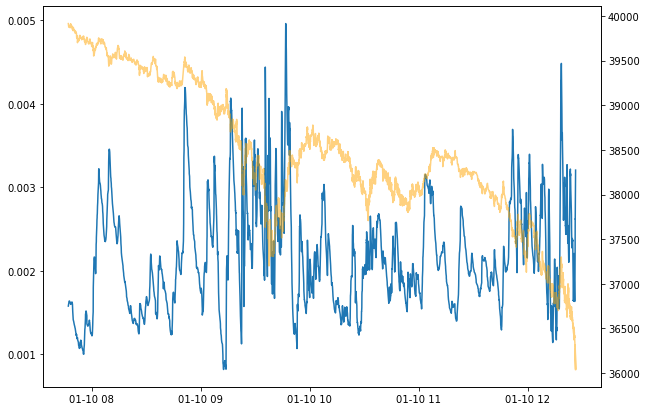

In [38]:
plot = df[40000:50000]

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(plot.vol)

ax1 = ax.twinx()
ax1.plot(plot.close, color='orange', alpha=.5)